<a href="https://colab.research.google.com/github/hargurjeet/DeepLearning/blob/main/NLP_Twitter_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [ ]:
# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/c/nlp-getting-started/data'
od.download(dataset_url)

In [ ]:
import zipfile
import os

parent_dir = '/content/nlp-getting-started'
directory = 'Train'

path = os.path.join(parent_dir, directory)
os.mkdir(path)

with zipfile.ZipFile('/content/nlp-getting-started/nlp-getting-started.zip', 'r') as zip_ref:
    zip_ref.extractall(path)

In [4]:
df = pd.read_csv("/content/nlp-getting-started/Train/train.csv")

df.shape

(7613, 5)

In [6]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

# https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate/34294022
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df.text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

In [12]:
df["text"] = df.text.map(remove_URL) # map(lambda x: remove_URL(x))
df["text"] = df.text.map(remove_punct)

In [13]:
# remove stopwords
# pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them 
# as the result of a search query.
stop = set(stopwords.words("english"))

# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop

In [14]:
df["text"] = df.text.map(remove_stopwords)

In [15]:
df.text

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                      m194 0104 utc5km volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [16]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)

In [17]:
len(counter)

17971

In [18]:

counter.most_common(5)

[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229)]

In [21]:
num_unique_words = len(counter)

In [22]:
# Split dataset into training and validation set
train_size = int(df.shape[0] * 0.8)

train_df = df[:train_size]
val_df = df[train_size:]

# split text and labels
# train_sentences = train_df.text.to_numpy()
# train_labels = train_df.target.to_numpy()
# val_sentences = val_df.text.to_numpy()
# val_labels = val_df.target.to_numpy()

train_sentences = train_df.text
train_labels = train_df.target
val_sentences = val_df.text
val_labels = val_df.target

In [20]:
train_sentences

array(['deeds reason earthquake may allah forgive us',
       'forest fire near la ronge sask canada',
       'residents asked shelter place notified officers evacuation shelter place orders expected',
       ..., 'feel like sinking unhappiness take quiz',
       'sinking music video tv career brooke hogan thanking dad free publicityalthough doubt help',
       'supernovalester feel bad literally feel feeling heart sinking bc didnt get anyone ugh jfc'],
      dtype=object)

In [23]:

# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [ ]:
word_index = tokenizer.word_index

word_index

In [25]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [26]:

print(train_sentences[10:15])
print(train_sequences[10:15])

10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa 18 19 ...
13                      flood bago myanmar arrived bago
14        damage school bus 80 multi car crash breaking
Name: text, dtype: object
[[520, 8, 395, 156, 297, 411], [749, 470, 2248, 138, 2249, 2813, 521, 611, 188, 470, 2248, 189, 189, 5679, 117], [2814, 117, 1884, 5680, 2248, 1285, 1450, 522, 256, 644, 2815], [99, 3742, 612, 1451, 3742], [111, 91, 336, 3743, 3744, 52, 22, 312]]


In [27]:

# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((6090, 20), (1523, 20))

In [28]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(train_padded)
training_labels = np.array(train_labels)
testing_padded = np.array(val_padded)
testing_labels = np.array(val_labels)

In [29]:

print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

three people died heat wave far
[520, 8, 395, 156, 297, 411]
[520   8 395 156 297 411   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [ ]:
# Check reversing the indices

# flip (key, value)
# reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [ ]:
# reverse_word_index

In [ ]:

# def decode(sequence):
#     return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [ ]:
# decoded_text = decode(train_sequences[10])

# print(train_sequences[10])
# print(decoded_text)

In [ ]:
# Create LSTM model
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have 
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a 
# dense vector of floating point values (the length of the vector is a parameter you specify).

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

# The layer will take as input an integer matrix of size (batch, input_length),
# and the largest integer (i.e. word index) in the input should be no larger than num_words (vocabulary size).
# Now model.output_shape is (None, input_length, 32), where `None` is the batch dimension.


model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

In [30]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_unique_words, 32, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            575072    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 575,889
Trainable params: 575,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# loss = keras.losses.BinaryCrossentropy(from_logits=False)
# optim = keras.optimizers.Adam(lr=0.001)
# metrics = ["accuracy"]

# model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [36]:
history = model.fit(train_padded, train_labels, epochs=5, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/5
191/191 - 1s - loss: 0.0320 - accuracy: 0.9849 - val_loss: 1.0961 - val_accuracy: 0.7255
Epoch 2/5
191/191 - 1s - loss: 0.0326 - accuracy: 0.9826 - val_loss: 1.1062 - val_accuracy: 0.7269
Epoch 3/5
191/191 - 1s - loss: 0.0326 - accuracy: 0.9839 - val_loss: 1.1039 - val_accuracy: 0.7209
Epoch 4/5
191/191 - 1s - loss: 0.0320 - accuracy: 0.9846 - val_loss: 1.1111 - val_accuracy: 0.7216
Epoch 5/5
191/191 - 1s - loss: 0.0317 - accuracy: 0.9846 - val_loss: 1.1502 - val_accuracy: 0.7321


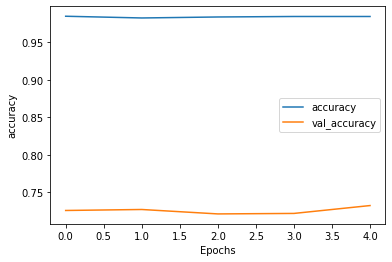

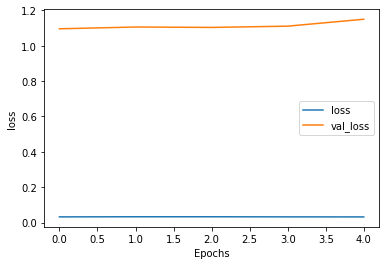

In [38]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [42]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(train_padded[2]))
print(train_sentences[2])
print(train_labels[2])

residents asked shelter place notified officers evacuation shelter place orders expected ? ? ? ? ? ? ? ? ?
residents asked shelter place notified officers evacuation shelter place orders expected
1


In [43]:
train_padded

array([[ 3739,   696,   235, ...,     0,     0,     0],
       [   71,     3,   129, ...,     0,     0,     0],
       [ 1448,  1186,  1882, ...,     0,     0,     0],
       ...,
       [  151,     1,  1256, ...,     0,     0,     0],
       [ 1256,   448,    15, ...,     0,     0,     0],
       [15469,   151,   204, ...,     0,     0,     0]], dtype=int32)

In [44]:

predictions = model.predict(train_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [45]:

print(train_sentences[10:20])

print(train_labels[10:20])
print(predictions[10:20])

10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa 18 19 ...
13                      flood bago myanmar arrived bago
14        damage school bus 80 multi car crash breaking
15                                            whats man
16                                          love fruits
17                                        summer lovely
18                                             car fast
19                                      goooooooaaaaaal
Name: text, dtype: object
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    0
19    0
Name: target, dtype: int64
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
